# Random Forest Classifier


## Get dataset

In [58]:
from finlab.ml import fundamental_features
dataset = fundamental_features()
dataset.count()

T3395營業利益          42233
T7210營運現金流         43006
T3950歸屬母公司淨利       38604
T7211折舊            42970
T0100流動資產          43314
T1100流動負債          43314
T7324取得不動產廠房及設備    41071
T3970經常稅後淨利        43082
R101_ROA稅後息前       33820
R11V_ROA綜合損益       40598
R103_ROE稅後         38514
R11U_ROE綜合損益       41271
R145_稅前息前折舊前淨利率    33229
R105_營業毛利率         41656
R106_營業利益率         41881
R107_稅前淨利率         41819
R108_稅後淨利率         41881
R112_業外收支營收率       41868
R179_貝里比率          41664
R203_研究發展費用率       32222
R205_現金流量比率        42058
R207_稅率            42063
R304_每股營業額         41882
R305_每股營業利益        42233
R303_每股現金流量        41500
R306_每股稅前淨利        42900
R314_每股綜合損益        42899
R315_每股稅前淨利        42900
R316_每股稅後淨利        38604
R504_總負債除總淨值       44258
R505_負債比率          43314
R506_淨值除資產         43271
R401_營收成長率         35012
R402_營業毛利成長率       34850
R403_營業利益成長率       35298
R404_稅前淨利成長率       35797
R405_稅後淨利成長率       35974
R406_經常利益成長率       32611
R408_資產總額成長率       35901
R409_淨值成長率         36569


In [59]:
print(dataset.shape)
dataset = dataset.dropna(thresh=int(len(dataset)*0.5), axis=1).dropna(how='any')
print(dataset.shape)

(62667, 49)
(18003, 49)


## Add labels

In [60]:
import finlab.ml as ml
features = dataset.columns
# features

ml.add_profit_prediction(dataset)
dataset = dataset.dropna()
dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...   R501_流動比率   R502_速動比率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...  123.837828  101.776758   
         2014-08-14     -0.952778      0.152556  ...  109.819505   91.450337   
         2014-11-14     -0.948101      2.168353  ...  113.370853   93.976558   
         2015-03-31     -1.265106      3.002608  ...  140.759054  117.966121   
         2015-05-15     -2.315297      0.069454  ...  132.899231  109.303861   

                     R503_利息支出率   R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  \
stock_id date                                                           
1101     2014-05-15   -9.792979  17732671.0      0.023981    0.550675   
         2014-08-14  -17.435186   7972516.0      0.028432    0.622629   
         2014-11-14  -17.800651  10552354.0      0.026593    0.581786   
         2015-03-31  -13.169666  27973772.0      0.025961    0.565798   
         2015-05-15   -7.153186  22891238.0      0.018713    0.455819   

                     R612_固定資產週轉次數  R613_淨值週轉率次  R69B_自由現金流量    return  
stock_id date                                                           
1101     2014-05-15    -81394854.0     0.044805    4901868.0  1.073347  
         2014-08-14    -74379365.0     0.052721   16542181.0  0.984816  
         2014-11-14    -76877637.0     0.049112    4768224.0  0.969163  
         2015-03-31    -78804395.0     0.047718  -10525322.0  0.956818  
         2015-05-15    -89211708.0     0.034296    8494249.0  0.850077  

[5 rows x 50 columns]

## Split Train Test dataset

In [62]:
select = dataset.index.get_level_values('date') < '2017'
dataset_train = dataset[select]
dataset_test = dataset[~select]

## Training

In [63]:
from sklearn.ensemble import RandomForestClassifier

cf = RandomForestClassifier(n_estimators=100)
cf.fit(dataset_train[features], dataset_train['return'] > 1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
cf.score(dataset_test[features], dataset_test['return'] > 1)

0.5369347017029436

## Prediction

In [65]:
import pandas as pd
prediction = cf.predict(dataset_test[features]) 

## Backtest

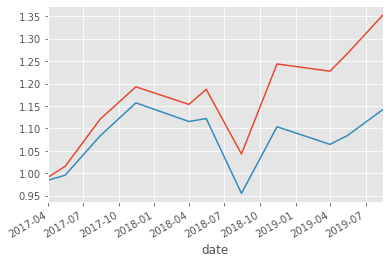

In [66]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

%matplotlib inline

returns1 = dataset_test['return'][prediction == True]
dates = returns1.index.get_level_values('date')
returns1.groupby(dates).mean().cumprod().plot()

returns2 = dataset_test['return'][prediction == False]
dates = returns2.index.get_level_values('date')
returns2.groupby(dates).mean().cumprod().plot()

## Feature Importance

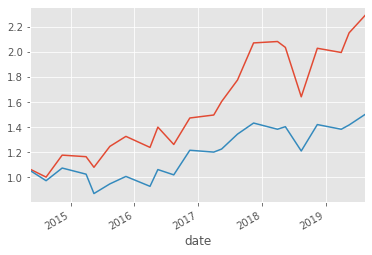

In [67]:
items = list(importance.head(20).index)

def select_stock(df):
    rank = df[items].rank(pct = True).sum(axis = 1)
    condition = rank.rank(pct = True) > 0.9
    return df[condition]['return'].mean()

dates = dataset.index.get_level_values("date")
dataset.groupby(dates).apply(select_stock).cumprod().plot()
dataset.groupby(dates).mean()['return'].cumprod().plot()

In [68]:
importance = pd.Series(cf.feature_importances_, index=features).sort_values(ascending=False)
importance

R409_淨值成長率         0.028889
R408_資產總額成長率       0.028536
R401_營收成長率         0.024002
R69B_自由現金流量        0.023828
R203_研究發展費用率       0.023552
R403_營業利益成長率       0.023303
R303_每股現金流量        0.022526
R103_ROE稅後         0.022231
R205_現金流量比率        0.022219
R112_業外收支營收率       0.022130
R610_存貨週轉率         0.022036
R404_稅前淨利成長率       0.021922
R402_營業毛利成長率       0.021861
R179_貝里比率          0.021246
R503_利息支出率         0.021214
R105_營業毛利率         0.021002
R207_稅率            0.020395
R106_營業利益率         0.020325
R406_經常利益成長率       0.020323
R11U_ROE綜合損益       0.020308
R405_稅後淨利成長率       0.020294
T7324取得不動產廠房及設備    0.020246
R607_總資產週轉次數       0.020242
R101_ROA稅後息前       0.020131
R11V_ROA綜合損益       0.020060
R305_每股營業利益        0.020003
R678_營運資金          0.019832
R502_速動比率          0.019679
T7210營運現金流         0.019644
R501_流動比率          0.019315
T7211折舊            0.019299
T3395營業利益          0.019297
R612_固定資產週轉次數      0.019224
T3970經常稅後淨利        0.018914
R613_淨值週轉率次        0.018892
R304_每股營業額         0

## New Strategy using feature importance

In [69]:
from finlab.data import Data
data = Data()
close = data.get('收盤價')
sma = close.rolling(60, min_periods =10).mean()
bias = close / sma

ml.add_feature(dataset, 'bias', bias)
dataset.head()

T3395營業利益  T7210營運現金流  T3950歸屬母公司淨利    T7211折舊  \
stock_id date                                                         
1101     2014-05-15  3684224.0   6895832.0     4015175.0  1594505.0   
         2014-08-14  5938317.0   4452573.0     -754894.0  1573692.0   
         2014-11-14  5544164.0   3701961.0     3621052.0  1587492.0   
         2015-03-31  4690964.0   4936554.0     6459366.0  1575810.0   
         2015-05-15  1693508.0   5654152.0      349121.0  1711428.0   

                      T0100流動資產   T1100流動負債  T7324取得不動產廠房及設備  T3970經常稅後淨利  \
stock_id date                                                               
1101     2014-05-15  92121458.0  74388787.0        -940633.0    2791235.0   
         2014-08-14  89163129.0  81190613.0        -465009.0    4828695.0   
         2014-11-14  89472928.0  78920574.0        -911057.0    4934486.0   
         2015-03-31  96605816.0  68632044.0       -1384489.0    4029460.0   
         2015-05-15  92471096.0  69579858.0        -818460.0     974518.0   

                     R101_ROA稅後息前  R11V_ROA綜合損益  ...   R502_速動比率  R503_利息支出率  \
stock_id date                                    ...                           
1101     2014-05-15     -1.732411      1.630076  ...  101.776758   -9.792979   
         2014-08-14     -0.952778      0.152556  ...   91.450337  -17.435186   
         2014-11-14     -0.948101      2.168353  ...   93.976558  -17.800651   
         2015-03-31     -1.265106      3.002608  ...  117.966121  -13.169666   
         2015-05-15     -2.315297      0.069454  ...  109.303861   -7.153186   

                      R678_營運資金  R607_總資產週轉次數  R610_存貨週轉率  R612_固定資產週轉次數  \
stock_id date                                                              
1101     2014-05-15  17732671.0      0.023981    0.550675    -81394854.0   
         2014-08-14   7972516.0      0.028432    0.622629    -74379365.0   
         2014-11-14  10552354.0      0.026593    0.581786    -76877637.0   
         2015-03-31  27973772.0      0.025961    0.565798    -78804395.0   
         2015-05-15  22891238.0      0.018713    0.455819    -89211708.0   

                     R613_淨值週轉率次  R69B_自由現金流量    return      bias  
stock_id date                                                      
1101     2014-05-15     0.044805    4901868.0  1.073347  0.960967  
         2014-08-14     0.052721   16542181.0  0.984816  1.021982  
         2014-11-14     0.049112    4768224.0  0.969163  0.971380  
         2015-03-31     0.047718  -10525322.0  0.956818  1.040769  
         2015-05-15     0.034296    8494249.0  0.850077  0.988372  

[5 rows x 51 columns]

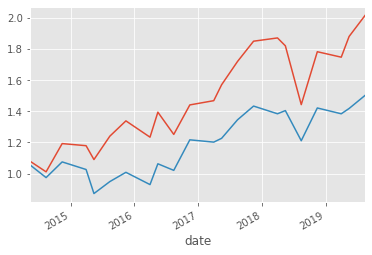

In [73]:
# 沒有考慮bias
items = list(importance.index[:20])

def select(df):
    rank = df[items].rank(pct = True).sum(axis=1)
    condition = rank.rank(pct = True) > 0.9
    return df[condition]['return'].mean()

dates = dataset.index.get_level_values('date')
dataset.groupby(dates).apply(select).cumprod().plot()
dataset['return'].groupby(dates).mean().cumprod().plot()

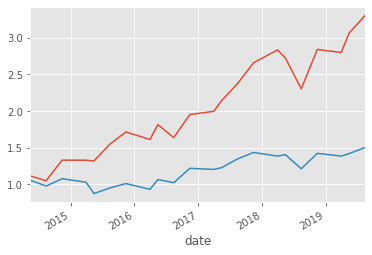

In [70]:
# 考慮bias
items = list(importance.index[:20])

def select(df):
    rank = df[items].rank(pct=True).sum(axis=1)
    return df[rank > rank.quantile(0.9)]['return'][df['bias'] > 1].mean()

dates = dataset.index.get_level_values('date')
dataset.groupby(dates).apply(select).cumprod().plot()
dataset['return'].groupby(dates).mean().cumprod().plot()